# 慈善行业

## 数据预处理

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px

In [2]:
df = pd.read_csv('../data/raw/data_science_for_fundraising_donor_data.csv')


In [3]:
df.head()

,ID,ZIPCODE,AGE,MARITAL_STATUS,GENDER,MEMBERSHIP_IND,ALUMNUS_IND,PARENT_IND,HAS_INVOLVEMENT_IND,WEALTH_RATING,...,CON_YEARS,PrevFYGiving,PrevFY1Giving,PrevFY2Giving,PrevFY3Giving,PrevFY4Giving,CurrFYGiving,TotalGiving,DONOR_IND,BIRTH_DATE
0,1,23187.0,NaN,Married,Female,N,N,N,N,NaN,...,1,$0,$0,$0,$0,$0,$0,10.0,Y,NaN
1,2,77643.0,33.0,NaN,Female,N,Y,N,Y,NaN,...,0,$0,$0,$0,$0,$0,$0,2100.0,Y,1984-06-16
2,3,NaN,NaN,Married,Female,N,N,N,N,NaN,...,1,$0,$0,$0,$0,$0,$200,200.0,Y,NaN
3,4,47141.0,31.0,NaN,Female,N,Y,N,Y,NaN,...,0,$0,$0,$0,$0,$0,$0,0.0,N,1986-12-03
4,5,92555.0,68.0,NaN,Female,N,N,N,N,NaN,...,0,$0,$0,$0,$0,$0,$0,505.0,Y,1949-09-11


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34508 entries, 0 to 34507
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   34508 non-null  int64  
 1   ZIPCODE              34417 non-null  float64
 2   AGE                  13318 non-null  float64
 3   MARITAL_STATUS       9940 non-null   object 
 4   GENDER               34015 non-null  object 
 5   MEMBERSHIP_IND       34508 non-null  object 
 6   ALUMNUS_IND          34508 non-null  object 
 7   PARENT_IND           34508 non-null  object 
 8   HAS_INVOLVEMENT_IND  34508 non-null  object 
 9   WEALTH_RATING        2709 non-null   object 
 10  DEGREE_LEVEL         7606 non-null   object 
 11  PREF_ADDRESS_TYPE    30465 non-null  object 
 12  EMAIL_PRESENT_IND    34508 non-null  object 
 13  CON_YEARS            34508 non-null  int64  
 14  PrevFYGiving         34508 non-null  object 
 15  PrevFY1Giving        34508 non-null 

In [6]:
df.columns


Index(['ID', 'ZIPCODE', 'AGE', 'MARITAL_STATUS', 'GENDER', 'MEMBERSHIP_IND',
       'ALUMNUS_IND', 'PARENT_IND', 'HAS_INVOLVEMENT_IND', 'WEALTH_RATING',
       'DEGREE_LEVEL', 'PREF_ADDRESS_TYPE', 'EMAIL_PRESENT_IND', 'CON_YEARS',
       'PrevFYGiving', 'PrevFY1Giving', 'PrevFY2Giving', 'PrevFY3Giving',
       'PrevFY4Giving', 'CurrFYGiving', 'TotalGiving', 'DONOR_IND',
       'BIRTH_DATE'],
      dtype='object')

### 数据清洗

## Type Transformation

'ID',
'ZIPCODE',
'AGE',
'MARITAL_STATUS',
'GENDER',
'MEMBERSHIP_IND',
'ALUMNUS_IND',
'PARENT_IND',
'HAS_INVOLVEMENT_IND',
'WEALTH_RATING',
'DEGREE_LEVEL',
'PREF_ADDRESS_TYPE',
'EMAIL_PRESENT_IND',
'CON_YEARS',
'PrevFYGiving',
'PrevFY1Giving',
'PrevFY2Giving',
'PrevFY3Giving',
'PrevFY4Giving',
'CurrFYGiving',
'TotalGiving',
'DONOR_IND',
'BIRTH_DATE'

In [15]:
def convert_currency_column(df):
    """
    Convert a currency column to numeric, removing any non-numeric characters.
    """
    df_copy = df.copy()
    for col_name in df_copy.columns:
        if df_copy[col_name].dtype == 'object':
            # Remove dollar signs and commas, then convert to float
            df_copy[col_name] = df_copy[col_name].str.replace('[\$,]', '', regex=True).astype(float)
    
    return df_copy


<>:9: SyntaxWarning: invalid escape sequence '\$'
<>:9: SyntaxWarning: invalid escape sequence '\$'
C:\Users\70902\AppData\Local\Temp\ipykernel_12536\4160540343.py:9: SyntaxWarning: invalid escape sequence '\$'
  df_copy[col_name] = df_copy[col_name].str.replace('[\$,]', '', regex=True).astype(float)


In [ ]:
dtype_dict = {
'ID': 'str',
'ZIPCODE': 'int64',
'AGE': 'int64',
'MARITAL_STATUS': 'str',
'GENDER': 'str',
'MEMBERSHIP_IND': 'bool',
'ALUMNUS_IND': 'bool',
'PARENT_IND': 'bool',
'HAS_INVOLVEMENT_IND': 'bool',
'WEALTH_RATING': 'str',
'DEGREE_LEVEL': 'str',
'PREF_ADDRESS_TYPE': 'str',
'EMAIL_PRESENT_IND': 'bool',
'CON_YEARS': 'int64',
'PrevFYGiving': 'float64',
'PrevFY1Giving': 'float64',
'PrevFY2Giving': 'float64',
'PrevFY3Giving': 'float64',
'PrevFY4Giving': 'float64',
'CurrFYGiving': 'float64',
'TotalGiving': 'float64',
'DONOR_IND': 'bool',
'BIRTH_DATE': 'datetime64[ns]'}

## 处理缺失值

在数据清洗中，处理缺失值是至关重要的。根据你的数据，有多个列存在缺失值，需要针对性地处理：

`ZIPCODE`, `AGE`, `MARITAL_STATUS`, `GENDER`, `WEALTH_RATING`, `DEGREE_LEVEL`, `PREF_ADDRESS_TYPE`, `BIRTH_DATE`：这些列都有不同程度的缺失值。

处理策略：

填充 (Imputation)：对于数值型数据如 AGE，可以考虑用均值、中位数或众数进行填充。对于分类数据如 MARITAL_STATUS 或 GENDER，可以填充一个新类别，例如“未知”（'Unknown'），或者用众数进行填充。

删除 (Deletion)：如果某些行的缺失值过多，或者缺失值对于分析不重要，可以考虑删除这些行。但请注意，删除过多数据可能会导致信息丢失。

保留 (Leave as is)：如果缺失值本身就代表一种信息（例如，WEALTH_RATING 的缺失可能代表没有财富评级），那么保留它们可能更合适

<Axes: >

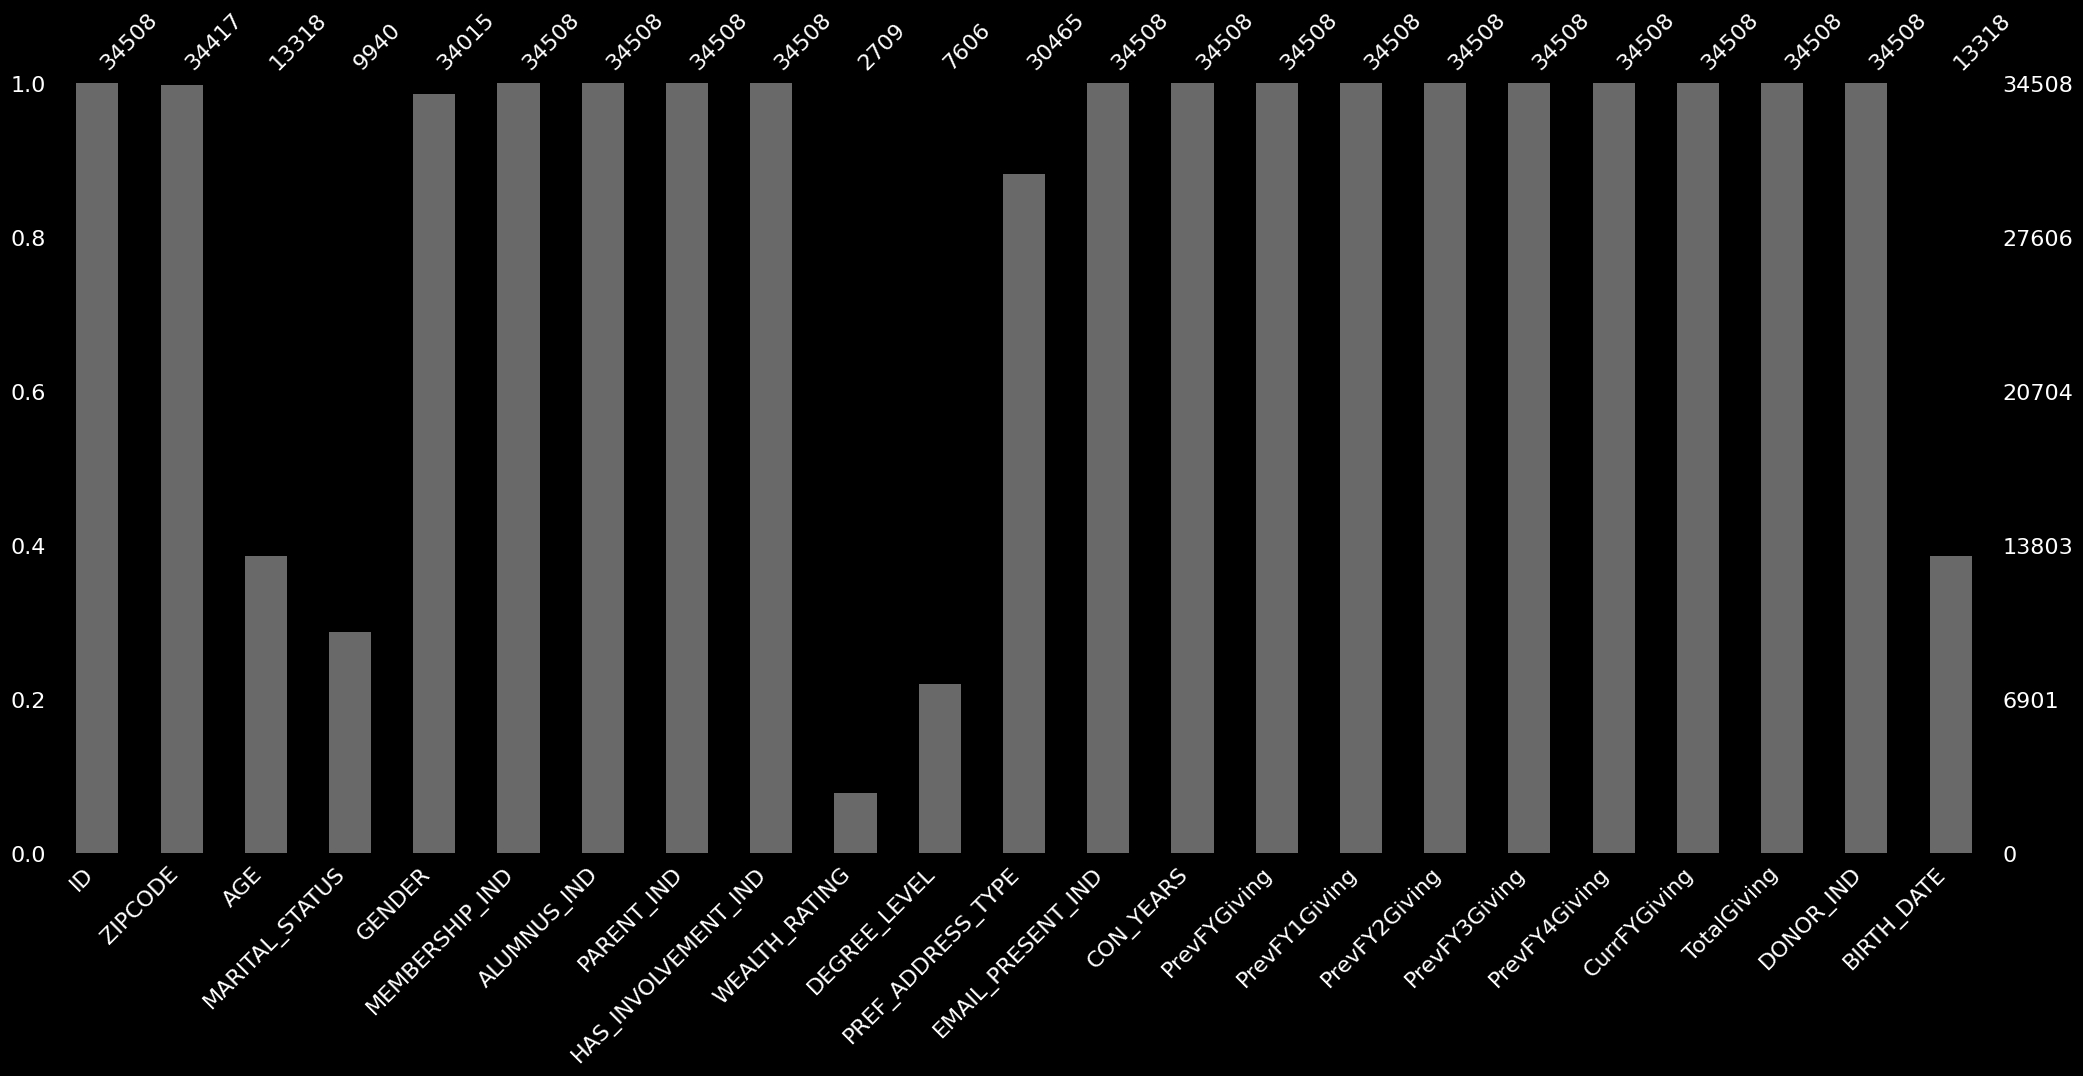

In [5]:
import missingno as msno

msno.bar(df)

# 